In [30]:
import pandas

location_file = '../data/locations.csv'
data_types = {
    "Location":str, 
    "Lat":float, 
    "Long":float, 
    "Years":int, 
    "Months":int
}
locations = pandas.read_csv(location_file, sep='\t', index_col="Location", dtype=data_types)

In [31]:
locations['TotalMonths'] = locations['Years']*12 + locations['Months']

In [32]:
remove_outliers = True
cutoff = 6
if remove_outliers:
    locations = locations[locations['TotalMonths'] > cutoff]

In [33]:
total_months = locations['TotalMonths'].sum()

In [34]:
locations['Weighted_Lat'] = locations.apply(lambda x: x['Lat']*x['TotalMonths']/total_months , axis=1)
locations['Weighted_Long'] = locations.apply(lambda x: x['Long']*x['TotalMonths']/total_months , axis=1)

In [35]:
avg_lat = locations['Weighted_Lat'].sum()
avg_long = locations['Weighted_Long'].sum()
avg_location = (avg_lat,avg_long)
print(avg_location)

(40.144734042553196, -98.78531914893617)


In [36]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


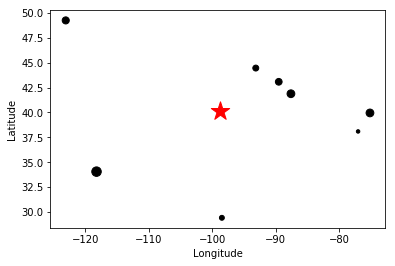

In [45]:
plt.scatter(locations['Long'],locations['Lat'], s = locations['TotalMonths'], c = 'black')
plt.scatter(avg_long, avg_lat, s = total_months, c = 'red', marker = "*")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()